In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

sales_data = pd.read_csv('/content/drive/My Drive/SoftComputing Project/sales_train.csv')
item_cat = pd.read_csv('/content/drive/My Drive/SoftComputing Project/item_categories.csv')
items = pd.read_csv('/content/drive/My Drive/SoftComputing Project/items.csv')
shops = pd.read_csv('/content/drive/My Drive/SoftComputing Project/shops.csv')
sample_submission = pd.read_csv('/content/drive/My Drive/SoftComputing Project/sample_submission.csv')
test_data = pd.read_csv('/content/drive/My Drive/SoftComputing Project/test.csv')


In [4]:
sales_data.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [5]:
test_data.head(3)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233


In [6]:
sample_submission.head(3)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5


In [7]:
def basic_eda(df):
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)
    
    

In [8]:


print("=============================Sales Data=============================")
basic_eda(sales_data)
print("=============================Test data=============================")
basic_eda(test_data)
print("=============================Item Categories=============================")
basic_eda(item_cat)
print("=============================Items=============================")
basic_eda(items)
print("=============================Shops=============================")
basic_eda(shops)
print("=============================Sample Submission=============================")
basic_eda(sample_submission)



=============================Sales Data=============================
----------TOP 5 RECORDS--------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
----------

In [9]:
# 'date' column in sales_data is an object but if we want to manipulate 
#  have to convert it on datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'],format = '%d.%m.%Y')

In [66]:
sales_data.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [11]:
 
dataset = sales_data.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')

In [12]:
dataset.head(3)

item_cnt_day                              ...                 \
date_block_num            0   1  2  3  4  5  6  7  8  9   ... 24 25 26 27 28   
shop_id item_id                                           ...                  
0       30                 0  31  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        31                 0  11  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        32                 6  10  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   

                                
date_block_num  29 30 31 32 33  
shop_id item_id                 
0       30       0  0  0  0  0  
        31       0  0  0  0  0  
        32       0  0  0  0  0  

[3 rows x 34 columns]

In [13]:
dataset.head(10)

item_cnt_day                              ...                 \
date_block_num            0   1  2  3  4  5  6  7  8  9   ... 24 25 26 27 28   
shop_id item_id                                           ...                  
0       30                 0  31  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        31                 0  11  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        32                 6  10  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        33                 3   3  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        35                 1  14  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        36                 0   1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        40                 0   1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        42                 0   1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        43                 1   0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        49                 0   2  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   

                                
date_block_num  29 30 31 32 33  
shop_id item_id                 
0       30       0  0  0  0  0  
        31       0  0  0  0  0  
        32       0  0  0  0  0  
        33       0  0  0  0  0  
        35       0  0  0  0  0  
        36       0  0  0  0  0  
        40       0  0  0  0  0  
        42       0  0  0  0  0  
        43       0  0  0  0  0  
        49       0  0  0  0  0  

[10 rows x 34 columns]

In [14]:
#  reset our indices
dataset.reset_index(inplace = True)

In [15]:

dataset.head(3)

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  

[3 rows x 36 columns]

In [16]:
#  merge pivot table with the test_data
dataset = pd.merge(test_data,dataset,on = ['item_id','shop_id'],how = 'left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [17]:
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# fill all NaN values with 0
dataset.fillna(0,inplace = True)
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
dataset.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#  keep all columns execpt the last one 
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)
# the last column is  label
y_train = dataset.values[:,-1:]

# for test keep all the columns execpt the first one
X_test = np.expand_dims(dataset.values[:,1:],axis = 2)


print(X_train.shape,y_train.shape,X_test.shape)


(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [21]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.5) ...
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155681 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 18.6 MB/s 
  Created wheel for libarchi

In [22]:

from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [23]:
print(X_train.shape[1])
print(X_train.shape[2])

33
1


In [24]:
# lstm model
model_lstm = Sequential()
model_lstm.add(LSTM(units = 64,input_shape = (X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1))

model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [25]:
history_lstm = model_lstm.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 9s 23ms/step - loss: 30.6564 - mean_squared_error: 30.6564
Epoch 2/10
53/53 [==============================] - 1s 22ms/step - loss: 30.2753 - mean_squared_error: 30.2753
Epoch 3/10
53/53 [==============================] - 1s 22ms/step - loss: 29.9976 - mean_squared_error: 29.9976
Epoch 4/10
53/53 [==============================] - 1s 21ms/step - loss: 29.9338 - mean_squared_error: 29.9338
Epoch 5/10
53/53 [==============================] - 1s 21ms/step - loss: 29.7716 - mean_squared_error: 29.7716
Epoch 6/10
53/53 [==============================] - 1s 22ms/step - loss: 29.7220 - mean_squared_error: 29.7220
Epoch 7/10
53/53 [==============================] - 1s 21ms/step - loss: 29.5759 - mean_squared_error: 29.5759
Epoch 8/10
53/53 [==============================] - 1s 24ms/step - loss: 29.6214 - mean_squared_error: 29.6214
Epoch 9/10
53/53 [==============================] - 1s 26ms/step - loss: 29.5214 - mean_squared_error: 29.5214
E

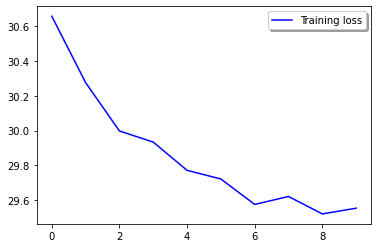

In [26]:
# Plot the loss curves for training
plt.plot(history_lstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [27]:
# creating submission file 
submission_pfs = model_lstm.predict(X_test)
# we will keep every value between 0 and 20
submission_pfs = submission_pfs.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
# creating csv file from dataframe
submission.to_csv('/content/drive/My Drive/SoftComputing Project/sub_pfs.csv',index = False)


In [28]:
submission.head(3)

,ID,item_cnt_month
0,0,0.396309
1,1,0.087816
2,2,0.749658


In [29]:
submission.shape, test_data.shape

((214200, 2), (214200, 3))

In [30]:
# MLP for Time Series Forecasting (Multilayer Perceptron )
from tensorflow.python.keras import optimizers as opt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model


model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dropout(0.4))
model_mlp.add(Dense(1))

model_mlp.compile(loss='mse', optimizer=keras.optimizers.Adam(), metrics = ['mean_squared_error'])
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               3400      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [31]:
history_mlp = model_mlp.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 1s 4ms/step - loss: 33.5264 - mean_squared_error: 33.5264
Epoch 2/10
53/53 [==============================] - 0s 3ms/step - loss: 31.3994 - mean_squared_error: 31.3994
Epoch 3/10
53/53 [==============================] - 0s 4ms/step - loss: 23.1722 - mean_squared_error: 23.1722
Epoch 4/10
53/53 [==============================] - 0s 4ms/step - loss: 26.4539 - mean_squared_error: 26.4539
Epoch 5/10
53/53 [==============================] - 0s 4ms/step - loss: 28.1818 - mean_squared_error: 28.1818
Epoch 6/10
53/53 [==============================] - 0s 4ms/step - loss: 19.9449 - mean_squared_error: 19.9449
Epoch 7/10
53/53 [==============================] - 0s 4ms/step - loss: 20.2890 - mean_squared_error: 20.2890
Epoch 8/10
53/53 [==============================] - 0s 4ms/step - loss: 18.0065 - mean_squared_error: 18.0065
Epoch 9/10
53/53 [==============================] - 0s 3ms/step - loss: 24.6582 - mean_squared_error: 24.6582
Epoch 10/1

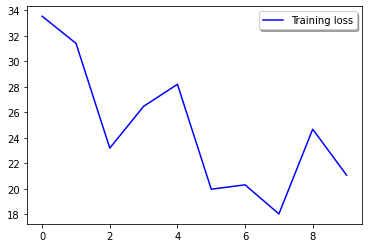

In [32]:
plt.plot(history_mlp.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [33]:
# creating submission file 
submission_mlp = model_mlp.predict(X_test)
# we will keep every value between 0 and 20
submission_mlp = submission_mlp.clip(0,20)
# creating dataframe with required columns 
submission2 = pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_mlp.ravel()})
# creating csv file from dataframe
submission2.to_csv('/content/drive/My Drive/SoftComputing Project/sub_mlp.csv',index = False)


In [34]:
submission2.head()

,ID,item_cnt_month
0,0,0.475837
1,1,0.139311
2,2,1.007088
3,3,0.128107
4,4,0.139311


In [35]:
#CNN for Time Series Forecasting

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=keras.optimizers.Adam(),metrics = ['mean_squared_error'])
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 32, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 50)                51250     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51,493
Trainable params: 51,493
Non-trainable params: 0
__________________________________________________

In [36]:
cnn_history = model_cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
6694/6694 [==============================] - 27s 3ms/step - loss: 25.9149 - mean_squared_error: 25.9149
Epoch 2/10
6694/6694 [==============================] - 21s 3ms/step - loss: 30.1226 - mean_squared_error: 30.1226
Epoch 3/10
6694/6694 [==============================] - 19s 3ms/step - loss: 28.2075 - mean_squared_error: 28.2075
Epoch 4/10
6694/6694 [==============================] - 19s 3ms/step - loss: 32.8490 - mean_squared_error: 32.8490
Epoch 5/10
6694/6694 [==============================] - 20s 3ms/step - loss: 34.8064 - mean_squared_error: 34.8064
Epoch 6/10
6694/6694 [==============================] - 22s 3ms/step - loss: 22.3582 - mean_squared_error: 22.3582
Epoch 7/10
6694/6694 [==============================] - 19s 3ms/step - loss: 25.2852 - mean_squared_error: 25.2852
Epoch 8/10
6694/6694 [==============================] - 19s 3ms/step - loss: 29.8218 - mean_squared_error: 29.8218
Epoch 9/10
6694/6694 [==============================] - 19s 3ms/step - loss: 25.

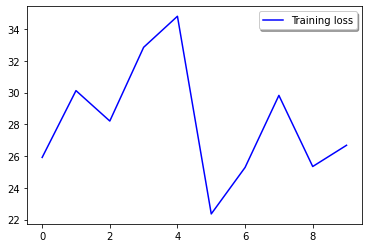

In [37]:
plt.plot(cnn_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [38]:
# creating submission file 
submission_cnn = model_cnn.predict(X_test)
# we will keep every value between 0 and 20
submission_cnn = submission_cnn.clip(0,20)
# creating dataframe with required columns 
submission3 = pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_cnn.ravel()})
# creating csv file from dataframe
submission3.to_csv('/content/drive/My Drive/SoftComputing Project/sub_cnn.csv',index = False)


In [39]:
submission3.head()

,ID,item_cnt_month
0,0,0.204736
1,1,0.162720
2,2,0.281424
3,3,0.260432
4,4,0.162720


In [40]:
#CNN-LSTM for Time Series Forecasting

#Reshape from [samples, timesteps, features] into [samples, subsequences, timesteps, features]

subsequences = 3
timesteps = X_train.shape[1]//subsequences
X_train_series_sub = X_train.reshape((X_train.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)


Train set shape (214200, 3, 11, 1)


In [41]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer=keras.optimizers.Adam(),metrics = ['mean_squared_error'])
model_cnn_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 11, 64)     128       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 5, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 320)        0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 50)                74200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                      

In [42]:
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, y_train, epochs=10)

Epoch 1/10
6694/6694 [==============================] - 67s 10ms/step - loss: 25.4456 - mean_squared_error: 25.4456
Epoch 2/10
6694/6694 [==============================] - 68s 10ms/step - loss: 27.8009 - mean_squared_error: 27.8009
Epoch 3/10
6694/6694 [==============================] - 68s 10ms/step - loss: 23.3139 - mean_squared_error: 23.3139
Epoch 4/10
6694/6694 [==============================] - 65s 10ms/step - loss: 23.4733 - mean_squared_error: 23.4733
Epoch 5/10
6694/6694 [==============================] - 68s 10ms/step - loss: 23.2198 - mean_squared_error: 23.2198
Epoch 6/10
6694/6694 [==============================] - 69s 10ms/step - loss: 20.2875 - mean_squared_error: 20.2875
Epoch 7/10
6694/6694 [==============================] - 65s 10ms/step - loss: 21.1019 - mean_squared_error: 21.1019
Epoch 8/10
6694/6694 [==============================] - 68s 10ms/step - loss: 16.6664 - mean_squared_error: 16.6664
Epoch 9/10
6694/6694 [==============================] - 64s 10ms/step - 

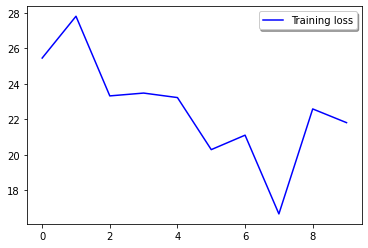

In [43]:
plt.plot(cnn_lstm_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

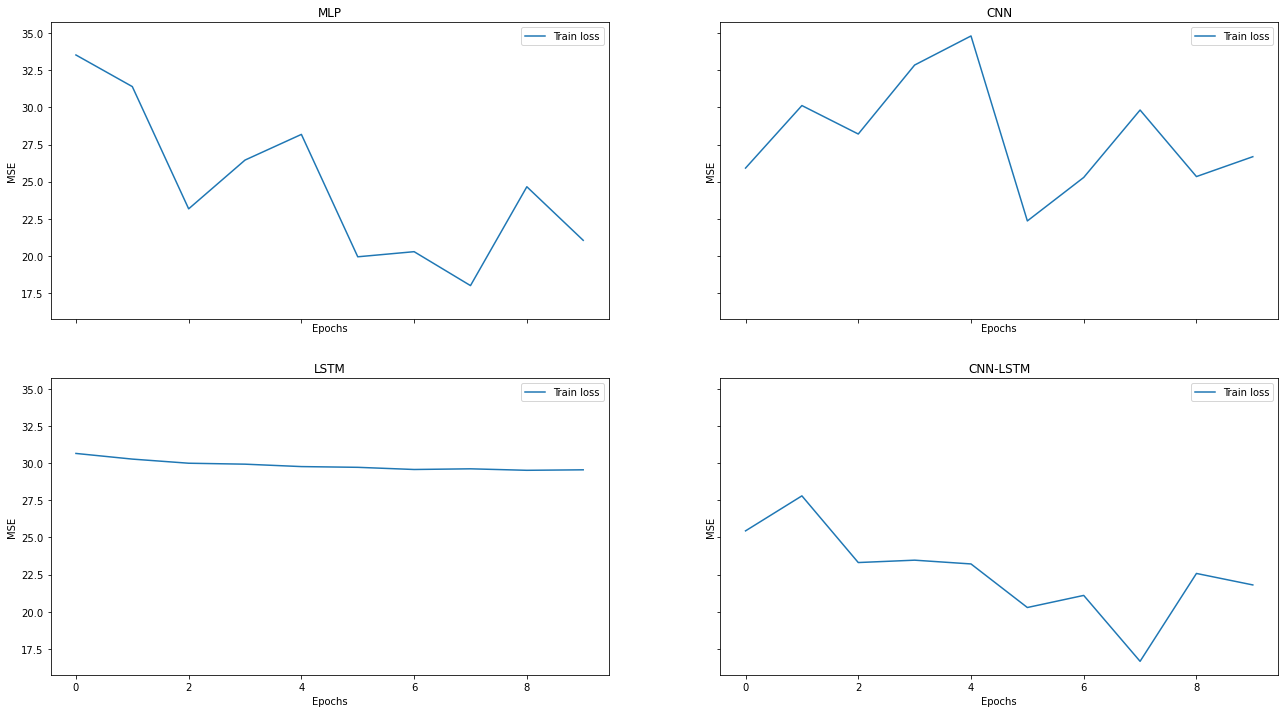

In [44]:
#Comparing models

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(22,12))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

ax1.plot(history_mlp.history['loss'], label='Train loss')
ax1.legend(loc='best')
ax1.set_title('MLP')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

ax2.plot(cnn_history.history['loss'], label='Train loss')
ax2.legend(loc='best')
ax2.set_title('CNN')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')

ax3.plot(history_lstm.history['loss'], label='Train loss')
ax3.legend(loc='best')
ax3.set_title('LSTM')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')

ax4.plot(cnn_lstm_history.history['loss'], label='Train loss')
ax4.legend(loc='best')
ax4.set_title('CNN-LSTM')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('MSE')

plt.show()

In [45]:
# bilstm model
from keras.layers import Bidirectional

model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(64, return_sequences=True), input_shape = (X_train.shape[1], X_train.shape[2])))
model_bilstm.add(Dropout(0.4))
model_bilstm.add(Dense(1))

model_bilstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])

model_bilstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 33, 128)          33792     
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 33, 128)           0         
                                                                 
 dense_6 (Dense)             (None, 33, 1)             129       
                                                                 
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________


In [46]:
history_bilstm = model_bilstm.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 5s 38ms/step - loss: 30.6783 - mean_squared_error: 30.6783
Epoch 2/10
53/53 [==============================] - 2s 37ms/step - loss: 30.3860 - mean_squared_error: 30.3860
Epoch 3/10
53/53 [==============================] - 2s 37ms/step - loss: 30.1544 - mean_squared_error: 30.1544
Epoch 4/10
53/53 [==============================] - 2s 37ms/step - loss: 29.9965 - mean_squared_error: 29.9965
Epoch 5/10
53/53 [==============================] - 2s 37ms/step - loss: 29.8268 - mean_squared_error: 29.8268
Epoch 6/10
53/53 [==============================] - 2s 37ms/step - loss: 29.6887 - mean_squared_error: 29.6887
Epoch 7/10
53/53 [==============================] - 2s 38ms/step - loss: 29.5555 - mean_squared_error: 29.5555
Epoch 8/10
53/53 [==============================] - 2s 38ms/step - loss: 29.4228 - mean_squared_error: 29.4228
Epoch 9/10
53/53 [==============================] - 2s 37ms/step - loss: 29.2991 - mean_squared_error: 29.2991
E

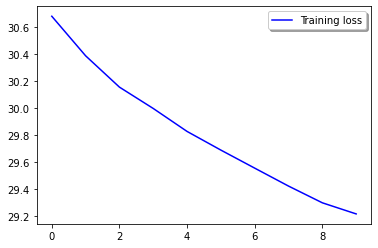

In [47]:
# Plot the loss curves for training
plt.plot(history_bilstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [48]:
#CNN-BiLSTM for Time Series Forecasting

#Reshape from [samples, timesteps, features] into [samples, subsequences, timesteps, features]

subsequences = 3
timesteps = X_train.shape[1]//subsequences
X_train_series_sub = X_train.reshape((X_train.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)

Train set shape (214200, 3, 11, 1)


In [49]:

model_cnn_bilstm = Sequential()
model_cnn_bilstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_bilstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_bilstm.add(TimeDistributed(Flatten()))
model_cnn_bilstm.add(Bidirectional(LSTM(50, return_sequences=True,activation='relu')))
model_cnn_bilstm.add(Dense(1))
model_cnn_bilstm.compile(loss='mse', optimizer=keras.optimizers.Adam(),metrics = ['mean_squared_error'])
model_cnn_bilstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, None, 11, 64)     128       
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, None, 5, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, None, 320)        0         
 tributed)                                                       
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 100)        148400    
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, None, 1)          

In [50]:
cnn_bilstm_history = model_cnn_bilstm.fit(X_train_series_sub, y_train, epochs=10)

Epoch 1/10
6694/6694 [==============================] - 120s 18ms/step - loss: 26.7480 - mean_squared_error: 26.7480
Epoch 2/10
6694/6694 [==============================] - 118s 18ms/step - loss: 26.3765 - mean_squared_error: 26.3765
Epoch 3/10
6694/6694 [==============================] - 116s 17ms/step - loss: 25.2130 - mean_squared_error: 25.2130
Epoch 4/10
6694/6694 [==============================] - 123s 18ms/step - loss: 25.1666 - mean_squared_error: 25.1666
Epoch 5/10
6694/6694 [==============================] - 118s 18ms/step - loss: 22.7081 - mean_squared_error: 22.7081
Epoch 6/10
6694/6694 [==============================] - 114s 17ms/step - loss: 27.7990 - mean_squared_error: 27.7990
Epoch 7/10
6694/6694 [==============================] - 115s 17ms/step - loss: 25.6574 - mean_squared_error: 25.6574
Epoch 8/10
6694/6694 [==============================] - 116s 17ms/step - loss: 27.1585 - mean_squared_error: 27.1585
Epoch 9/10
6694/6694 [==============================] - 115s 17m

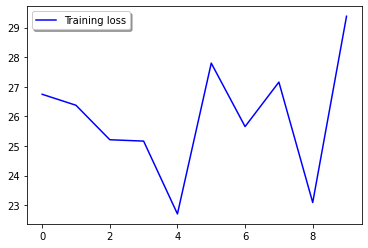

In [51]:
plt.plot(cnn_bilstm_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [52]:
# gru model
model_gru = Sequential()
model_gru.add(GRU(units = 64,input_shape = (X_train.shape[1], X_train.shape[2])))
model_gru.add(Dropout(0.4))
model_gru.add(Dense(1))

In [53]:
model_gru.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [54]:
history_gru= model_gru.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 2s 17ms/step - loss: 30.4571 - mean_squared_error: 30.4571
Epoch 2/10
53/53 [==============================] - 1s 16ms/step - loss: 30.1860 - mean_squared_error: 30.1860
Epoch 3/10
53/53 [==============================] - 1s 16ms/step - loss: 30.1186 - mean_squared_error: 30.1186
Epoch 4/10
53/53 [==============================] - 1s 16ms/step - loss: 29.9725 - mean_squared_error: 29.9725
Epoch 5/10
53/53 [==============================] - 1s 16ms/step - loss: 29.8963 - mean_squared_error: 29.8963
Epoch 6/10
53/53 [==============================] - 1s 16ms/step - loss: 29.8352 - mean_squared_error: 29.8352
Epoch 7/10
53/53 [==============================] - 1s 16ms/step - loss: 29.7784 - mean_squared_error: 29.7784
Epoch 8/10
53/53 [==============================] - 1s 16ms/step - loss: 29.6931 - mean_squared_error: 29.6931
Epoch 9/10
53/53 [==============================] - 1s 16ms/step - loss: 29.6103 - mean_squared_error: 29.6103
E

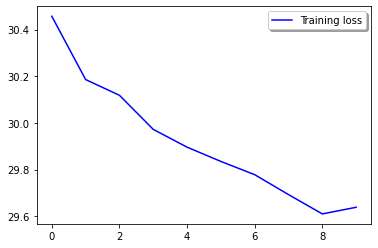

In [55]:
# Plot the loss curves for training
plt.plot(history_gru.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [56]:
# bigru model
from keras.layers import Bidirectional

model_bigru = Sequential()
model_bigru.add(Bidirectional(GRU(64, return_sequences=True), input_shape = (X_train.shape[1], X_train.shape[2])))
model_bigru.add(Dropout(0.4))
model_bigru.add(Dense(1))

model_bigru.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])

model_bigru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 33, 128)          25728     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 33, 128)           0         
                                                                 
 dense_9 (Dense)             (None, 33, 1)             129       
                                                                 
Total params: 25,857
Trainable params: 25,857
Non-trainable params: 0
_________________________________________________________________


In [57]:
history_bigru = model_bigru.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 5s 37ms/step - loss: 30.5143 - mean_squared_error: 30.5143
Epoch 2/10
53/53 [==============================] - 2s 36ms/step - loss: 30.2605 - mean_squared_error: 30.2605
Epoch 3/10
53/53 [==============================] - 2s 36ms/step - loss: 30.0726 - mean_squared_error: 30.0726
Epoch 4/10
53/53 [==============================] - 2s 36ms/step - loss: 29.9043 - mean_squared_error: 29.9043
Epoch 5/10
53/53 [==============================] - 2s 36ms/step - loss: 29.7529 - mean_squared_error: 29.7529
Epoch 6/10
53/53 [==============================] - 2s 36ms/step - loss: 29.6249 - mean_squared_error: 29.6249
Epoch 7/10
53/53 [==============================] - 2s 37ms/step - loss: 29.5080 - mean_squared_error: 29.5080
Epoch 8/10
53/53 [==============================] - 2s 37ms/step - loss: 29.3976 - mean_squared_error: 29.3976
Epoch 9/10
53/53 [==============================] - 2s 37ms/step - loss: 29.2899 - mean_squared_error: 29.2899
E

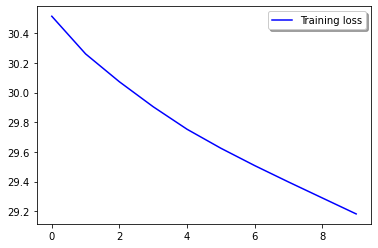

In [58]:
# Plot the loss curves for training
plt.plot(history_bigru.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [59]:
#CNN-BiGRU for Time Series Forecasting

#Reshape from [samples, timesteps, features] into [samples, subsequences, timesteps, features]

subsequences = 3
timesteps = X_train.shape[1]//subsequences
X_train_series_sub = X_train.reshape((X_train.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)

Train set shape (214200, 3, 11, 1)


In [60]:
model_cnn_bigru = Sequential()
model_cnn_bigru.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_bigru.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_bigru.add(TimeDistributed(Flatten()))
model_cnn_bigru.add(Bidirectional(GRU(50, return_sequences=True,activation='relu')))
model_cnn_bigru.add(Dense(1))
model_cnn_bigru.compile(loss='mse', optimizer=keras.optimizers.Adam(),metrics = ['mean_squared_error'])
model_cnn_bigru.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, None, 11, 64)     128       
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, None, 5, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, None, 320)        0         
 tributed)                                                       
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 100)        111600    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, None, 1)          

In [61]:
cnn_bigru_history = model_cnn_bigru.fit(X_train_series_sub, y_train, epochs=10)

Epoch 1/10
6694/6694 [==============================] - 141s 21ms/step - loss: 24.4129 - mean_squared_error: 24.4129
Epoch 2/10
6694/6694 [==============================] - 140s 21ms/step - loss: 29.4814 - mean_squared_error: 29.4814
Epoch 3/10
6694/6694 [==============================] - 139s 21ms/step - loss: 29.4159 - mean_squared_error: 29.4159
Epoch 4/10
6694/6694 [==============================] - 138s 21ms/step - loss: 23.7018 - mean_squared_error: 23.7018
Epoch 5/10
6694/6694 [==============================] - 138s 21ms/step - loss: 28.0951 - mean_squared_error: 28.0951
Epoch 6/10
6694/6694 [==============================] - 138s 21ms/step - loss: 25.3370 - mean_squared_error: 25.3370
Epoch 7/10
6694/6694 [==============================] - 139s 21ms/step - loss: 24.5731 - mean_squared_error: 24.5731
Epoch 8/10
6694/6694 [==============================] - 139s 21ms/step - loss: 25.8616 - mean_squared_error: 25.8616
Epoch 9/10
6694/6694 [==============================] - 138s 21m

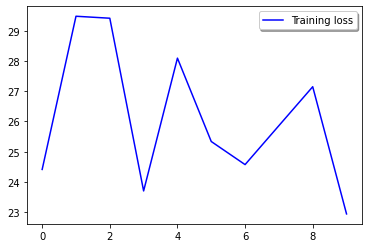

In [62]:
plt.plot(cnn_bigru_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

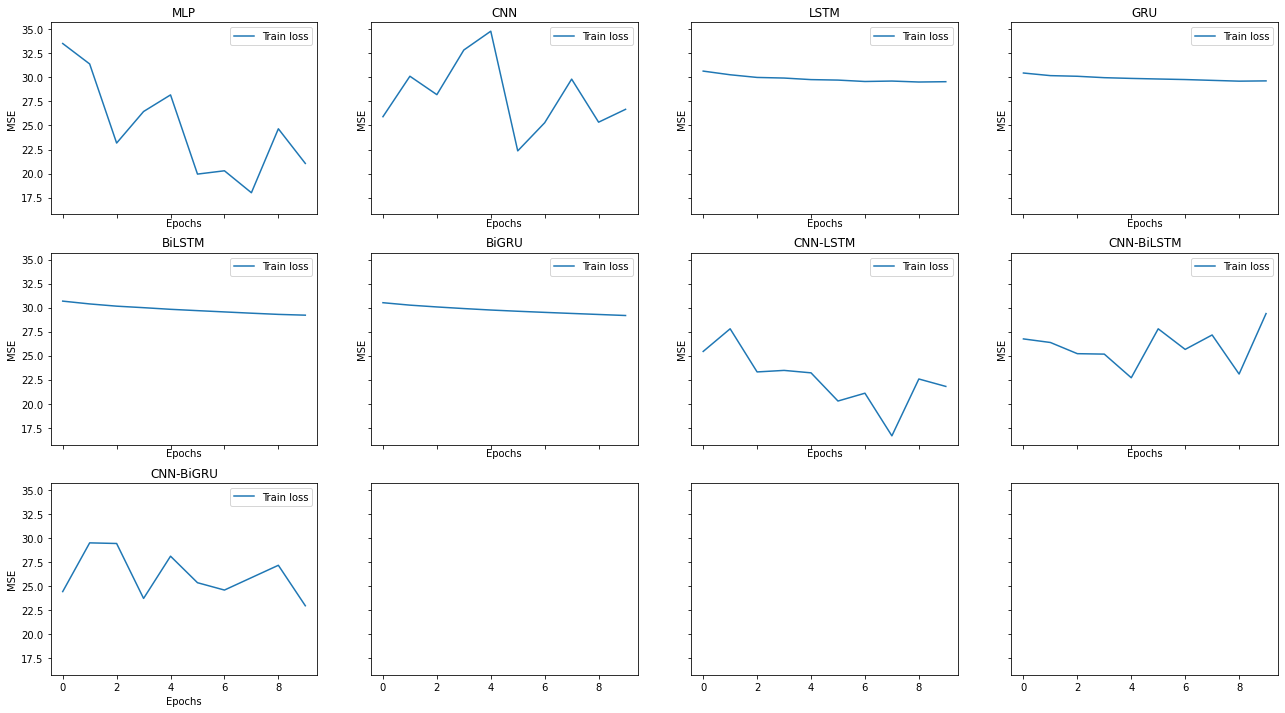

In [70]:
#Comparing models

fig, axes = plt.subplots(3, 4, sharex=True, sharey=True,figsize=(22,12))
ax1, ax2, ax3, ax4 = axes[0]
ax5, ax6, ax7, ax8 = axes[1]
ax9, ax10, ax11, ax12   = axes[2]

ax1.plot(history_mlp.history['loss'], label='Train loss')
ax1.legend(loc='best')
ax1.set_title('MLP')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')


ax2.plot(cnn_history.history['loss'], label='Train loss')
ax2.legend(loc='best')
ax2.set_title('CNN')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')


ax3.plot(history_lstm.history['loss'], label='Train loss')
ax3.legend(loc='best')
ax3.set_title('LSTM')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')


ax4.plot(history_gru.history['loss'], label='Train loss')
ax4.legend(loc='best')
ax4.set_title('GRU')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('MSE')


ax5.plot(history_bilstm.history['loss'], label='Train loss')
ax5.legend(loc='best')
ax5.set_title('BiLSTM')
ax5.set_xlabel('Epochs')
ax5.set_ylabel('MSE')


ax6.plot(history_bigru.history['loss'], label='Train loss')
ax6.legend(loc='best')
ax6.set_title('BiGRU')
ax6.set_xlabel('Epochs')
ax6.set_ylabel('MSE')


ax7.plot(cnn_lstm_history.history['loss'], label='Train loss')
ax7.legend(loc='best')
ax7.set_title('CNN-LSTM')
ax7.set_xlabel('Epochs')
ax7.set_ylabel('MSE')



ax8.plot(cnn_bilstm_history.history['loss'], label='Train loss')
ax8.legend(loc='best')
ax8.set_title('CNN-BiLSTM')
ax8.set_xlabel('Epochs')
ax8.set_ylabel('MSE')



ax9.plot(cnn_bigru_history.history['loss'], label='Train loss')
ax9.legend(loc='best')
ax9.set_title('CNN-BiGRU')
ax9.set_xlabel('Epochs')
ax9.set_ylabel('MSE')

plt.show()

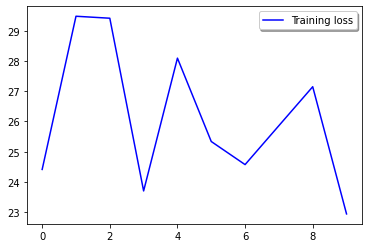

In [71]:
plt.plot(cnn_bigru_history.history['loss'], cnn_bilstm_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

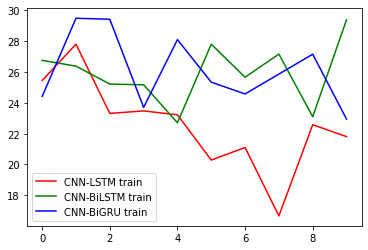

In [89]:
plt.plot(cnn_lstm_history.history['loss'], label='CNN-LSTM train', color='red')

plt.plot(cnn_bilstm_history.history['loss'], label='CNN-BiLSTM train', color='green')

plt.plot(cnn_bigru_history.history['loss'], label='CNN-BiGRU train', color='blue')



plt.legend()
plt.show()

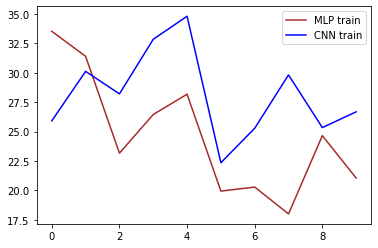

In [86]:
plt.plot(history_mlp.history['loss'], label='MLP train', color='brown')

plt.plot(cnn_history.history['loss'], label='CNN train', color='blue')


plt.legend()
plt.show()

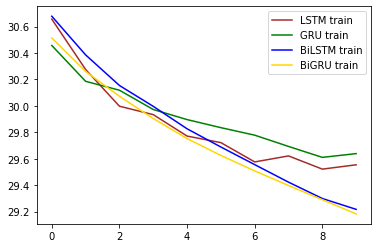

In [88]:


plt.plot(history_lstm.history['loss'], label='LSTM train', color='brown')

plt.plot(history_gru.history['loss'], label='GRU train', color='green')


plt.plot(history_bilstm.history['loss'], label='BiLSTM train', color='blue')

plt.plot(history_bigru.history['loss'], label='BiGRU train', color='gold')



plt.legend()
plt.show()